In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
print(df.shape)
print(df.dtypes)

(891, 15)
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
z = [['Jackson', 68, True, np.NaN, 'A'],
['Liam', 74, True, 1.1, 'A'],
['Emma', np.NaN, False, 0.89, 'C'],
['James', 78, np.NaN, 0.91, 'C'],
['Ava', 54, False, 0.73, 'C'],
['Henry', 69, True, np.NaN, 'C']]
df = pd.DataFrame(data= z, columns=['Name', 'Weight', 'Option', 'Rate', 'Type'])
df

,Name,Weight,Option,Rate,Type
0,Jackson,68.0,True,NaN,A
1,Liam,74.0,True,1.10,A
2,Emma,NaN,False,0.89,C
3,James,78.0,NaN,0.91,C
4,Ava,54.0,False,0.73,C
5,Henry,69.0,True,NaN,C


In [ ]:
m = df['Weight'].mean()
df['Weight'].fillna(m, inplace=True)
df

,Name,Weight,Option,Rate,Type
0,Jackson,68.0,True,NaN,A
1,Liam,74.0,True,1.10,A
2,Emma,68.6,False,0.89,C
3,James,78.0,NaN,0.91,C
4,Ava,54.0,False,0.73,C
5,Henry,69.0,True,NaN,C


# 크롤링

In [ ]:
from bs4 import BeautifulSoup as bs
import requests
import os

In [ ]:
#한글 폰트 설치

In [ ]:
'''
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
'''

'\n!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n'

In [ ]:
res = requests.get('https://dhlottery.co.kr/common.do?method=main')

soup = bs(res.content, 'html.parser')
result = soup.select('.ball_645')
data = []

for num in result:
  data.append(int(num.text))

data

[12, 16, 21, 24, 41, 43, 15]

In [ ]:
res = requests.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8')
soup = bs(res.content, 'html.parser')

result = soup.select('.temperature_text')
data = []

for i in result:
  data.append(i.text)

print(data[0])

5
 현재 온도0.0° 


In [ ]:
res = requests.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%84%9C%EC%9A%B8+%EB%82%A0%EC%94%A8')
soup = bs(res.content, 'html.parser')

contents = soup.find_all('dl', attrs={'class':'graph_content'})

time = []
temp = []

for i in contents:
  time.append(i[0])
  temp.append(i[2])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=83b211ab74127a2b39556a16f5c366ce57586848f5c7823b6086398fb8ab2ff9
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=99eda7bb4b9cbe70ee6a9597bc25248a7dc3effdf67ea15537ab9049e690da38
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

In [ ]:
import newspaper as news

link = 'https://n.news.naver.com/sports/wfootball/article/108/0003203098'
article = news.Article(link, language = 'ko')
article.download()
article.parse()
print(article.text)

모두에게 보여주고 싶은 기사라면?beta 이 기사를 추천합니다 버튼을 눌러주세요.

집계 기간 동안 추천을 많이 받은 기사는 네이버 자동 기사배열 영역에 추천 요소로 활용됩니다. 레이어 닫기


In [ ]:
import requests
from bs4 import BeautifulSoup as bs
url = 'https://n.news.naver.com/mnews/hotissue/article/031/0000754250?type=series&cid=1087780'
res = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})
res.content

b'<!doctype html>\n<html lang="ko" data-useragent="Mozilla/5.0">\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" />\n\t\t<meta property="og:title" content="\xeb\x84\xb7\xed\x94\x8c\xeb\xa6\xad\xec\x8a\xa4, \xea\xb5\xad\xeb\x82\xb4\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb3\x84\xec\xa0\x95\xea\xb3\xb5\xec\x9c\xa0 \xea\xb8\x88\xec\xa7\x80 \xea\xb3\x84\xed\x9a\x8d\xe2\x80\xa6\xec\xa0\x81\xec\x9a\xa9 \xec\x8b\x9c\xec\xa0\x90\xec\x9d\x80 \'\xeb\xb6\x88\xed\x88\xac\xeb\xaa\x85\' [OTT\xec\x98\xa8\xec\x97\x90\xec\x96\xb4]">\n\t\t<meta property="og:type" content="article">\n\t\t<meta property="og:url" content="https://n.news.naver.com/mnews/hotissue/article/031/0000754250?cid&#x3D;1087780">\n\t\t<meta property="og:image" content="https://imgnews.pstatic.net/image/031/2023/06/25/0000754250_001_20230625080101079.jpg?t

In [ ]:
'''
import os
import requests
from bs4 import BeautifulSoup
url = "https://comic.naver.com/webtoon/detail.nhn?titleId=747961&no=2"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')
if not(os.path.isdir("./webtoon")):
 os.makedirs(os.path.join("./webtoon"))
i = 1
for tag in soup.select('.wt_viewer img'):
 img_url = tag['src']
 save_img = "./webtoon/" + str(i).zfill(3) + img_url[-4:]
 i += 1
 print(save_img + " : OK")
 headers = {'Referer': img_url}
 img_data = requests.get(img_url, headers=headers).content

 with open(save_img, 'wb') as f:
  f.write(img_data)
  '''

'\nimport os\nimport requests\nfrom bs4 import BeautifulSoup\nurl = "https://comic.naver.com/webtoon/detail.nhn?titleId=747961&no=2"\nhtml = requests.get(url).text\nsoup = BeautifulSoup(html, \'html.parser\')\nif not(os.path.isdir("./webtoon")):\n os.makedirs(os.path.join("./webtoon"))\ni = 1\nfor tag in soup.select(\'.wt_viewer img\'):\n img_url = tag[\'src\']\n save_img = "./webtoon/" + str(i).zfill(3) + img_url[-4:]\n i += 1\n print(save_img + " : OK")\n headers = {\'Referer\': img_url}\n img_data = requests.get(img_url, headers=headers).content\n \n with open(save_img, \'wb\') as f:\n  f.write(img_data)\n  '

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
url = "https://n.news.naver.com/mnews/hotissue/article/031/0000754250?type=series&cid=1087780"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')
if not(os.path.isdir("./photo")):
 os.makedirs(os.path.join("./photo"))
i = 1
for tag in soup.select('_LAZY_LOADING'):
 img_url = tag['src']
 save_img = "./photo/" + str(i).zfill(3) + img_url[-4:]
 i += 1
 print(save_img + " : OK")
 headers = {'Referer': img_url}
 img_data = requests.get(img_url, headers=headers).content

 with open(save_img, 'wb') as f:
  f.write(img_data)


In [ ]:
import os
import requests
from bs4 import BeautifulSoup
url = 'https://n.news.naver.com/sports/wfootball/article/108/0003203098'
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

if not(os.path.isdir("./photo")):
  os.makedirs(os.path.join("./photo"))

i = 1
for tag in soup.select('._LAZY_LOADING img'):
  img_url = tag['src']
  save_img = "./photo/" + str(i).zfill(3) + img_url[-4:]
  i += 1
  print(save_img + " : OK")
  headers = {'Referer': img_url}
  img_data = requests.get(img_url, headers=headers).content

with open(save_img, 'wb') as f:
  f.write(img_data)

In [ ]:
res = requests.get('http://www.cine21.com/movie/info/?movie_id=58978')
soup = bs(res.content, 'html.parser')

contents = soup.select('.comment')

for i in contents:
  print(i.text)

권력이 영원할 줄 아는 사악한 바보들에게
검사의 봄에 되돌아보는, 뱀의 욕망이 낳은 탄식과 울분의 밤
여러모로 아슬아슬하다
‘어떻게 성공했지?’라는 궁금증과 하나회를 향한 분노가 왔다 갔다
‘전두광 영화’가 되지 않았다는 점이 놀랍다
바둑을 오셀로로 뒤집으려는 병법의 하룻밤


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
sns.set_style('darkgrid')

<ipython-input-64-efe6a4dcf2c4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic.corr()


<Axes: >

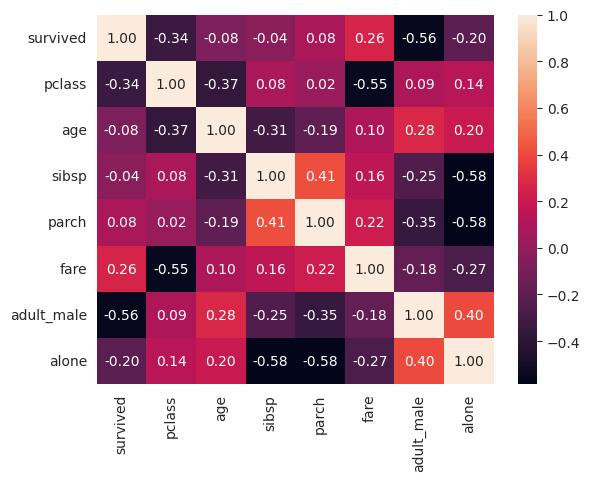

In [ ]:
corr = titanic.corr()

sns.heatmap(corr, annot = True, fmt=".2f")

In [ ]:
corr = titanic.corr()
corr = corr.loc['survived']
corr = corr.drop(['survived'])
corr = corr[abs(corr)>0.2]
corr = corr.sort_values(ascending=True)
print(corr)

adult_male   -0.557080
pclass       -0.338481
alone        -0.203367
fare          0.257307
Name: survived, dtype: float64


<ipython-input-62-f7201d081fdd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic.corr()


<Axes: xlabel='adult_male', ylabel='survived'>

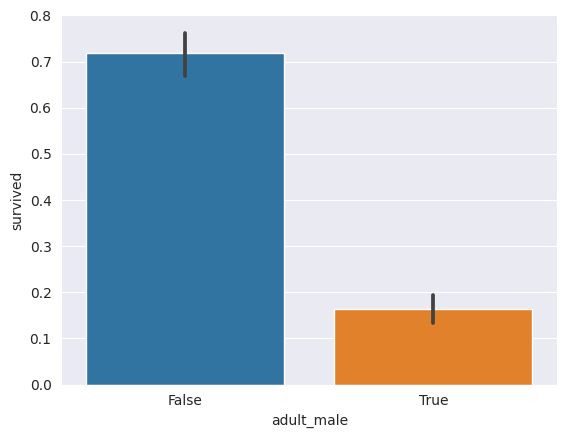

In [ ]:
x = titanic['adult_male']
y = titanic['survived']

sns.barplot(x=x, y=y)

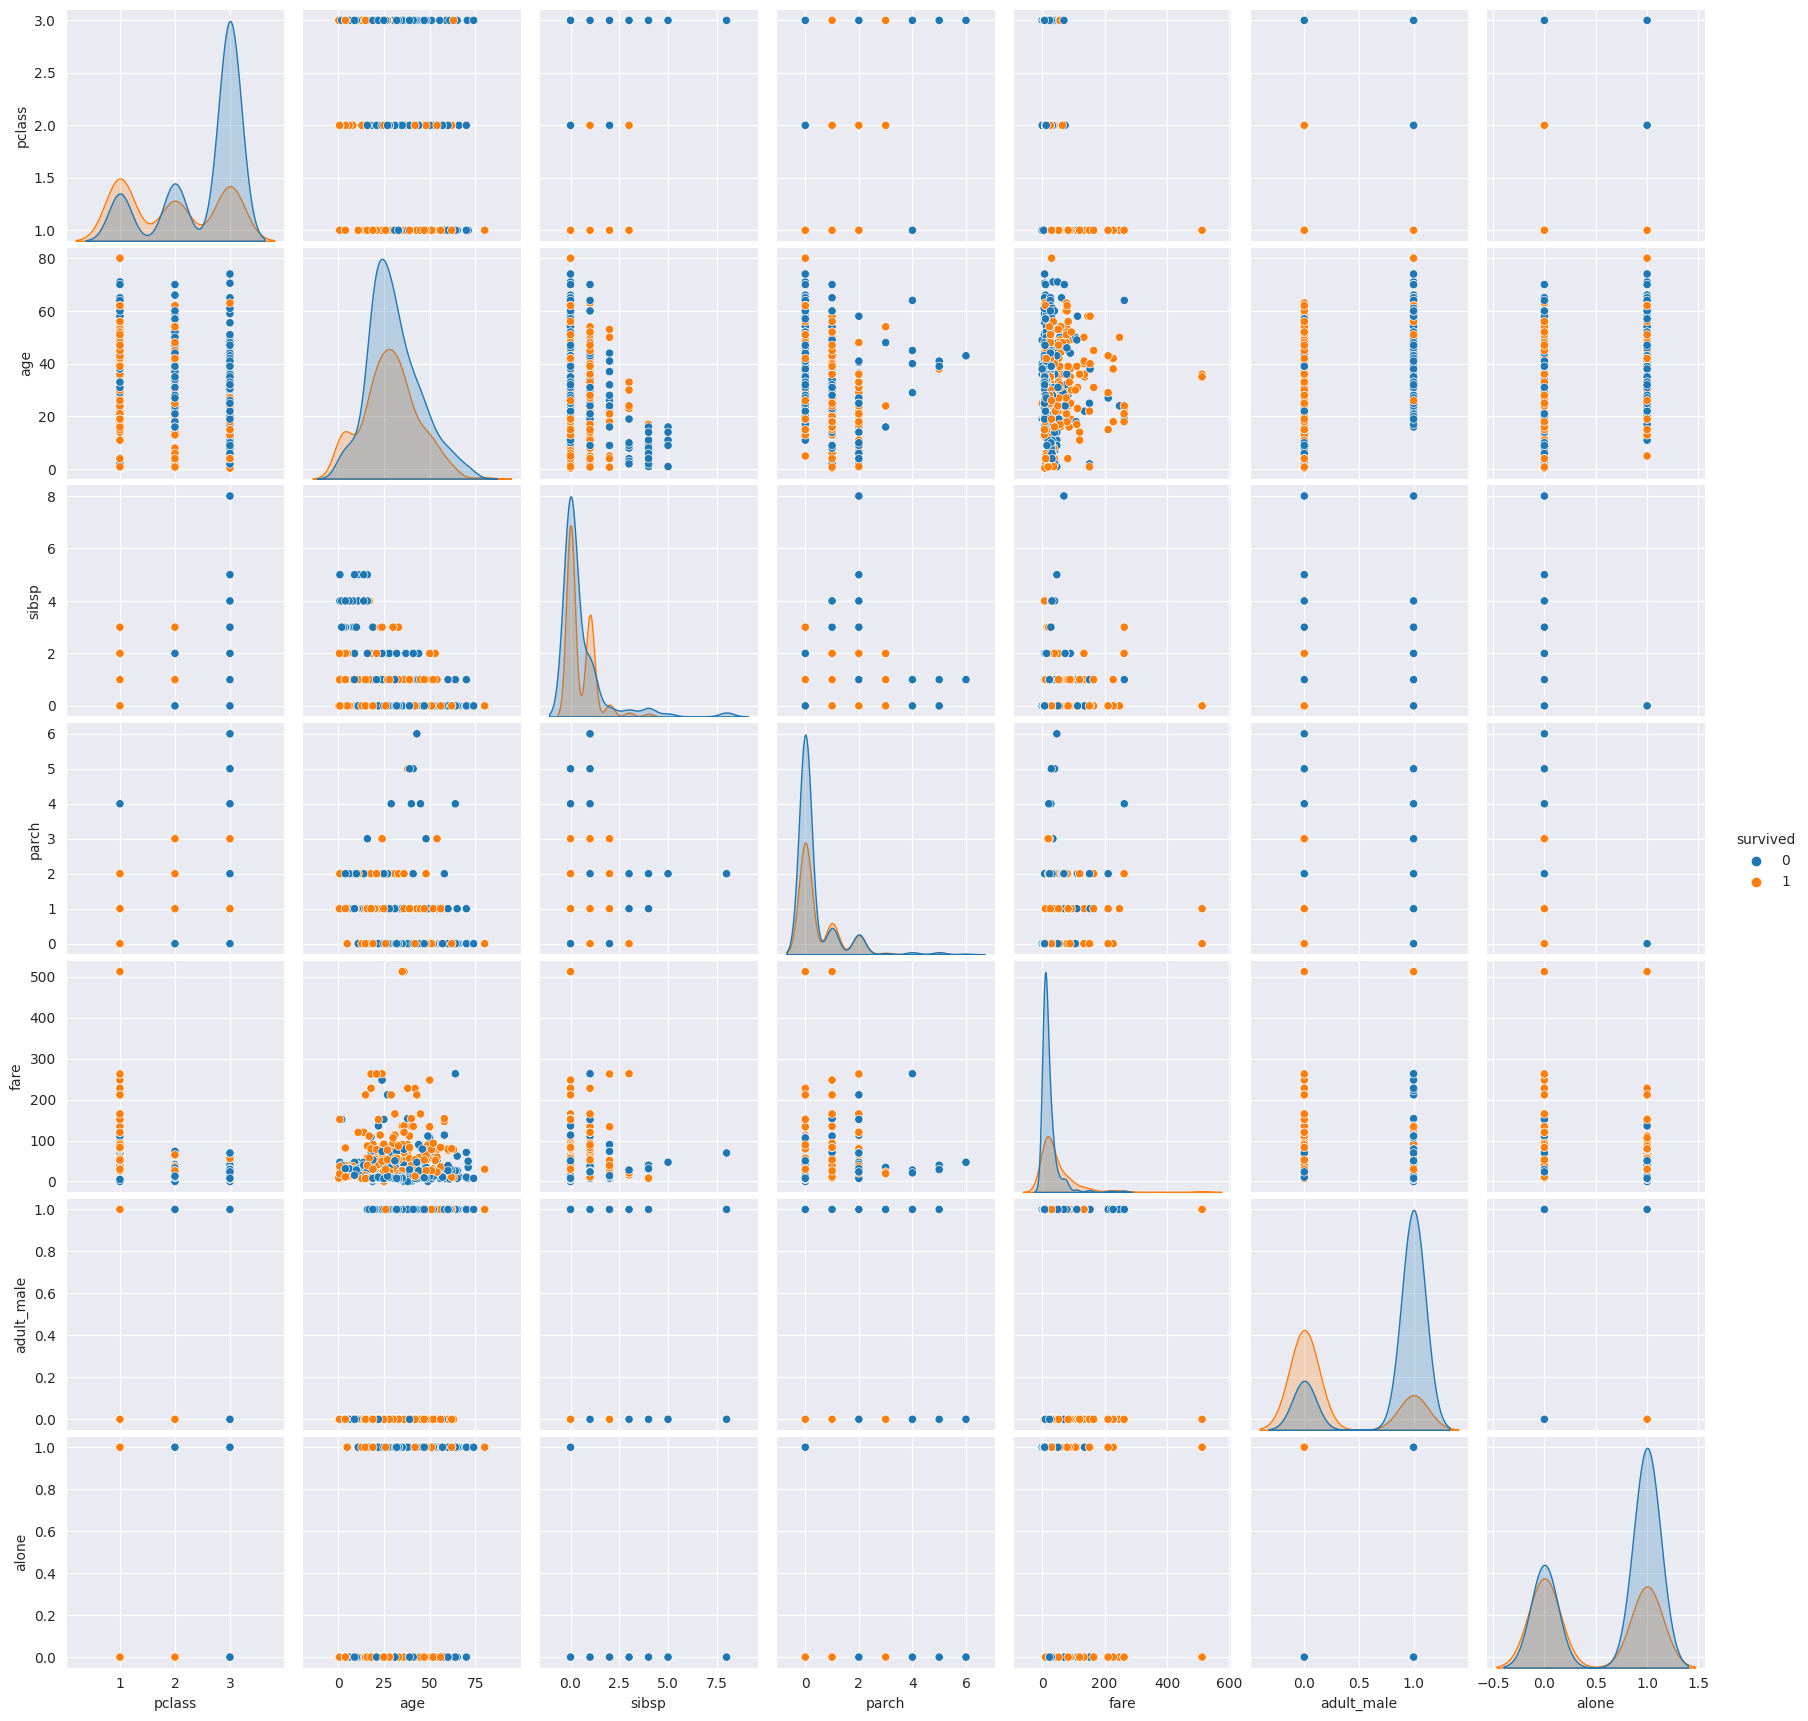

In [ ]:
sns.pairplot(titanic, hue='survived')
plt.show()

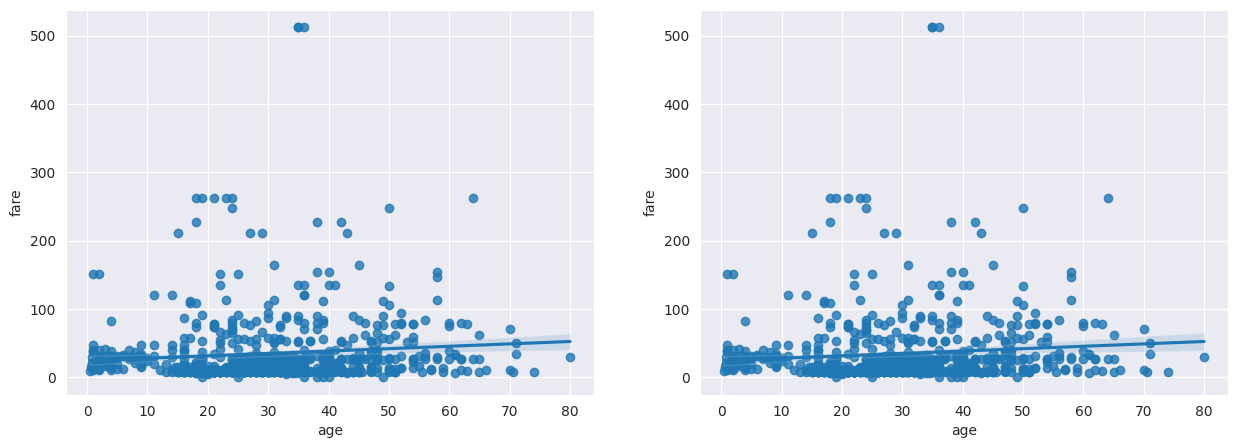

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='age', y='fare', data=titanic, ax=ax1)
sns.regplot(x='age', y='fare', data=titanic, ax=ax2)
plt.show()

# Folium-지도만들기
❖ Folium 라이브러리의 Map() 함수를 이용하면 간단하게 지도 객체 생성  
• 지도 화면은 고정된 것이 아니고 줌(zoom)  
가능과 화면 이동(scroll)이 모두 가능  
• Folium은 웹 기반 지도를 만들기 때문에 오직 웹 환경에서만 지도를 확인할 수 있음  
• 지도 객체에 save() 메소드를 적용해 HTML 파일로 저장  
• 웹 브라우저에서 파일을 열어서 확인할 수 있다.

In [ ]:
import folium

seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)
seoul_map.save('map.html')

In [ ]:
import folium

seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', zoom_start=12)
seoul_map2

In [ ]:
import folium

seoul_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner', zoom_start=15)
seoul_map3

In [ ]:
import folium

seoul_map = folium.Map(location=[37.55897, 127.0001], zoom_start=15)
seoul_map

In [ ]:
location=(37.55897, 127.0001)
folium.Map(location, tiles="OpenStreetMap")

In [ ]:
location=(37.55897, 127.0001)
folium.Map(location, tiles="CartoDB positron")

In [ ]:
location=(37.55897, 127.0001)
folium.Map(location, tiles="CartoDB dark_matter")

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('seoulUniv.xlsx')
df.head()

,학교명,위도,경도
0,KAIST 서울캠퍼스,37.592573,127.046737
1,KC대학교,37.548345,126.854797
2,가톨릭대학교(성신교정),37.585922,127.004328
3,가톨릭대학교(성의교정),37.499623,127.006065
4,감리교신학대학교,37.567645,126.961610


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학교명     47 non-null     object 
 1   위도      47 non-null     float64
 2   경도      47 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
df.columns

Index(['학교명', '위도', '경도'], dtype='object')

In [ ]:
for name, lat, lng in zip(df.index, df.위도, df.경도):
  folium.CircleMarker([lat,lng], radius=10, color='brwon', fill=True, fill_color='coral', fill_opacity=0.7, popup=name).add_to(seoul_map)

seoul_map